## SVM

### COLAB Setup

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'SVM.ipynb', 'XGBoost.ipynb', 'Combined.ipynb', 'Untitled0.ipynb']


In [ ]:

import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData


### Setup

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVC
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

In [ ]:
# setting a random seed for reproducibility
import random

random.seed(4)

# number of iterations for alg that takes iterations
ITERCOUNT = 100000

In [ ]:
random.shuffle(allData)

### SVM

In [ ]:
allData_df = pd.DataFrame(allData)

allData_df.insert(0, 'Ones', 1)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1]
Y = allData_df.iloc[:,cols-1:cols]

display(allData_df)

,Ones,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1,65,67,79,116,1,0,0,8,0
1,1,219,337,0,0,1,1,1,7,0
2,1,252,509,0,28,1,1,0,11,0
3,1,58,2132,0,0,0,0,0,14,1
4,1,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...
1189,1,234,658,93,2,1,0,0,14,0
1190,1,846,743,22,38,1,0,0,12,0
1191,1,384,219,51,11,1,1,0,12,0
1192,1,323,405,0,69,1,1,0,10,0


In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=4)
y_train_array = np.ravel(y_train)

### Tuning the SVM

In [ ]:
kernels = ["linear", "poly", "sigmoid"]
svms = {}
for kernel in kernels:
    if kernel == "poly":
        for degree in range(2,7):
            svms[f"{kernel}{degree}"] = SVC(random_state=4, kernel=kernel, degree=degree)
    elif kernel == "sigmoid":
        for coef in range(4):
            svms[f"{kernel}{coef}"] = SVC(random_state=4, kernel=kernel, coef0=coef)
    else:
        svms[kernel] = SVC(random_state=4, kernel=kernel, degree=3)

In [ ]:
for kernel in svms.keys():
    trained_svm = svms[kernel].fit(x_train, y_train_array)
    print(f"{kernel} accuracy : {trained_svm.score(x_test, y_test)}")

linear accuracy : 0.9498327759197325
poly2 accuracy : 0.9297658862876255
poly3 accuracy : 0.9331103678929766
poly4 accuracy : 0.9130434782608695
poly5 accuracy : 0.9230769230769231
poly6 accuracy : 0.919732441471572
sigmoid0 accuracy : 0.9096989966555183
sigmoid1 accuracy : 0.9297658862876255
sigmoid2 accuracy : 0.9264214046822743
sigmoid3 accuracy : 0.8260869565217391


### Training the linear SVM

In [ ]:
svm_model = SVC(random_state=4, kernel="linear")
svm = svm_model.fit(x_train, y_train_array)

svm.score(x_test, y_test)

0.9498327759197325

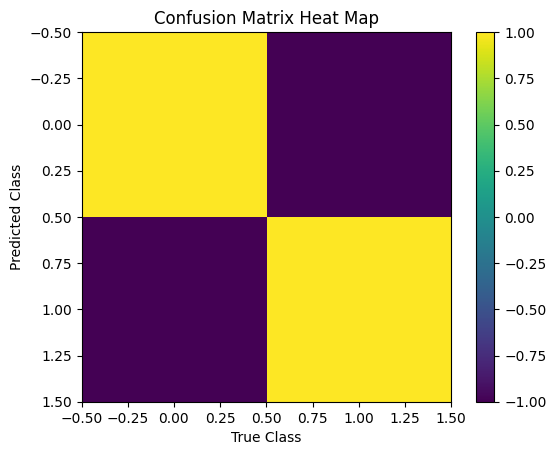

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.91      0.79      0.85        53

    accuracy                           0.95       299
   macro avg       0.93      0.89      0.91       299
weighted avg       0.95      0.95      0.95       299



In [ ]:
y_test_array = np.ravel(y_test)
svm_pred = svm.predict(X = x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svm_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)

plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

svm_report = classification_report(y_true = y_test, y_pred = svm_pred)
print(svm_report)



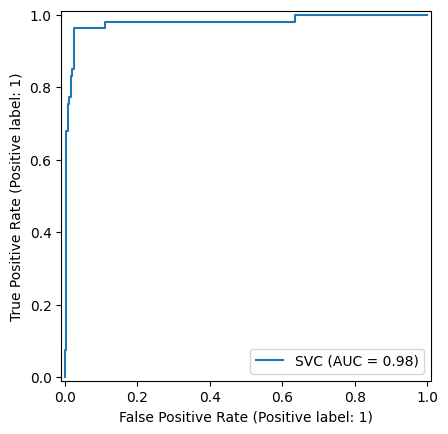

In [ ]:
from sklearn.metrics import RocCurveDisplay
svm_roc_disp = RocCurveDisplay.from_estimator(svm, x_test, y_test)
plt.show()

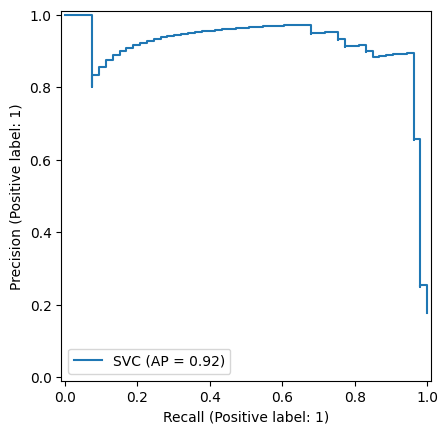

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
svm_prc_disp = PrecisionRecallDisplay.from_estimator(svm, x_test, y_test)
plt.show()

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=4)

scores = cross_val_score(svm_model, X_scaled, np.ravel(Y), cv=kf, scoring="accuracy")

print(f"Avg K-Fold accuracy: {np.mean(scores)}")

Avg K-Fold accuracy: 0.9455574698498646
